<a href="https://colab.research.google.com/github/evgeny-kolonsky/Lab4/blob/main/CU/Lab4_Curie_heat_capacitance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [65]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.constants import mu_0 as mu0
from scipy.optimize import curve_fit
from scipy.stats import norm
from scipy.integrate import cumulative_trapezoid as cumtrapz


/tmp/ipython-input-2621426089.py:22: RuntimeWarning: overflow encountered in exp
  return Tenv + (T0 - Tenv) * np.exp(-k * (time - t0))
/tmp/ipython-input-2621426089.py:22: RuntimeWarning: overflow encountered in multiply
  return Tenv + (T0 - Tenv) * np.exp(-k * (time - t0))


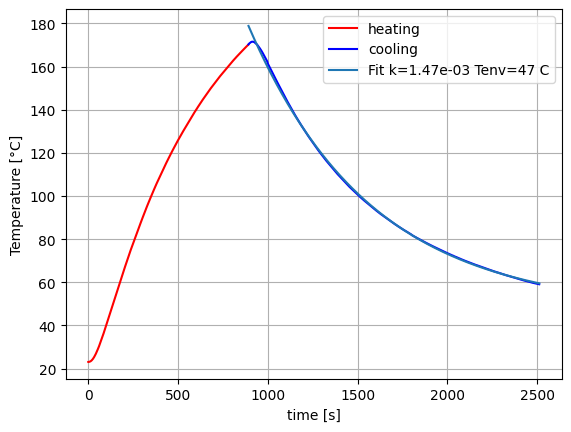

In [113]:
#set 12
#url = 'https://raw.githubusercontent.com/tphlabs/data/refs/heads/main/Lab4_Curie/set12_sample1/scan_N1.csv'
url = 'https://raw.githubusercontent.com/tphlabs/data/refs/heads/main/Lab4_Curie/2025.09/9_1.csv'
temp, V1, V2, phi, V, I = np.loadtxt(url, delimiter=',', skiprows=8, usecols=[1,2,3,4,5,6], unpack=True)
time = np.arange(V1.size)

# skip 1st 10 seconbds
#time = time_[time_>10]
#temp = temp[time_>10]

# timeline
# timeline
heating = I > 0
cooling = I == 0
t0 = np.max(time[heating])

plt.grid()
plt.ylabel('Temperature [°C]')
plt.xlabel('time [s]')

def cooling_law(time, k, T0, Tenv):
  return Tenv + (T0 - Tenv) * np.exp(-k * (time - t0))


initial = [0.5, 170+273, 300]
parameters, _ = curve_fit(cooling_law, time[cooling], temp[cooling], p0=initial)
temp_expected =  cooling_law(time[cooling], *parameters)
k = parameters[0]
Tenv = parameters[2]
plt.plot(time[heating], temp[heating],  label='heating',  color='red')
plt.plot(time[cooling], temp[cooling], label='cooling',  color='blue')
plt.plot(time[cooling], temp_expected, label=f'Fit k={k:.2e} Tenv={Tenv:.0f} C')
plt.legend()

(1.0, 1.5)

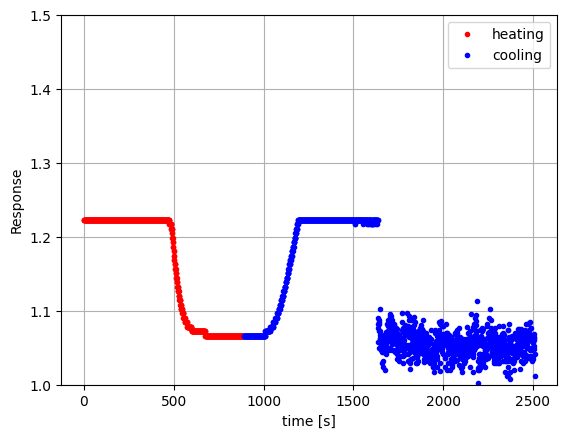

In [114]:
response = V2 / V1
plt.plot(time[heating], response[heating], '.', color='red', label='heating')
plt.plot(time[cooling], response[cooling], '.', color='blue', label='cooling')
plt.legend()
plt.grid()
plt.xlabel('time [s]')
plt.ylabel('Response')
plt.ylim(1, 1.5)

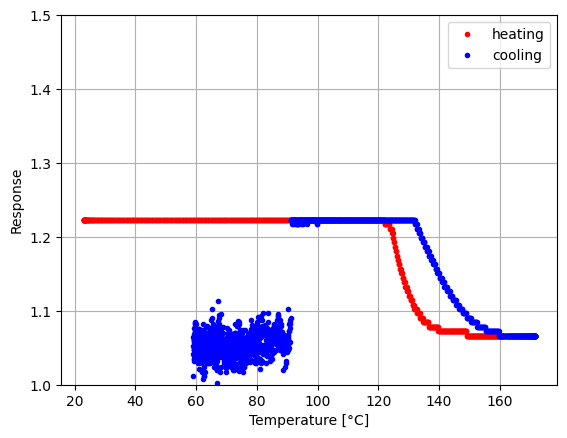

In [115]:
plt.plot(temp[heating], response[heating], '.', color='red', label='heating')
plt.plot(temp[cooling], response[cooling], '.', color='blue', label='cooling')
plt.legend()
plt.xlabel('Temperature [°C]')
plt.ylabel('Response')
plt.ylim(1, 1.5)
plt.grid()

At cooling
$$
\dot T_{cooling} = -k (T - T_{env})
$$
We find parameters $k$ and $T_{env}$ by fitting cooling part $T(t)$ data.

At heating assuming that there is no cooling
$$
\dot T_{heating} = \frac{\dot Q}{c} = \frac{P}{c}, \quad P = I\cdot V \cos\varphi
$$

Total temperature change is explained by heating and coling
$$
\dot T = \dot T_{heating} + \dot T_{cooling} = \frac{P}{c} - k (T - T_{env})
$$

Therefore
$$
c = \frac{P}{\dot T  +k (T - T_{env})}
$$

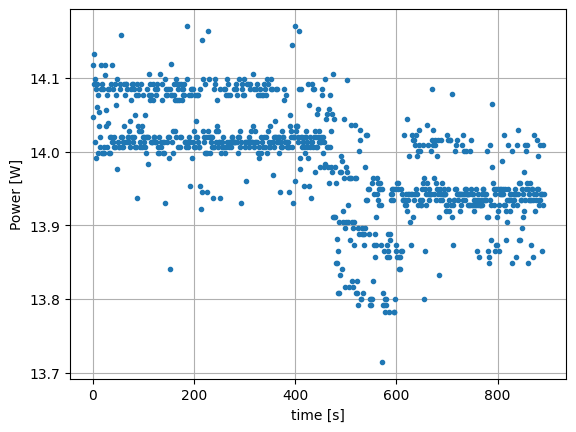

In [116]:
P = V * I * np.cos(phi / 180* np.pi)
plt.plot(time[heating], P[heating],'.')
plt.xlabel('time [s]')
plt.ylabel('Power [W]')
plt.grid()

(500.0, 1000.0)

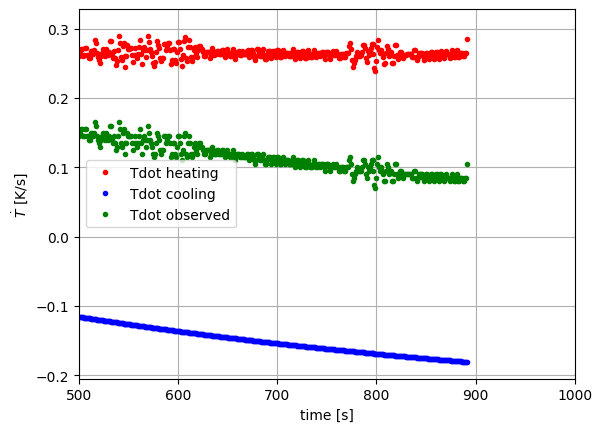

In [117]:
tdot = np.gradient(temp, time)
tdot_cooling = -k * (temp - Tenv)
tdot_heating = tdot - tdot_cooling
plt.plot(time[heating] , tdot_heating[heating], '.', color='red', label='Tdot heating')
plt.plot(time[heating] , tdot_cooling[heating], '.', color='blue', label='Tdot cooling')
plt.plot(time[heating] , tdot[heating], '.', color='green', label='Tdot observed')
plt.legend()
plt.grid()
plt.xlabel('time [s]')
plt.ylabel(r'$\dot T$ [K/s]')
#plt.plot(P[heating] /tdot_heating[heating], '.')
plt.xlim(500, 1000)
#plt.ylim(0, 100)

Text(0, 0.5, 'Temperature [K]')

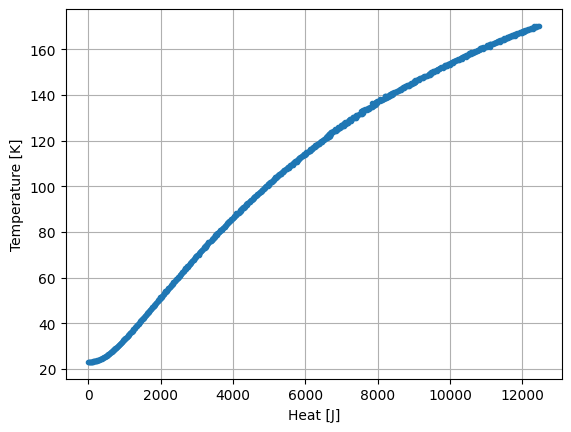

In [118]:
Q = P[heating] * time[heating]
plt.plot(Q, temp[heating], '.')
plt.grid()
plt.xlabel('Heat [J]')
plt.ylabel('Temperature [K]')

(1.0, 1.5)

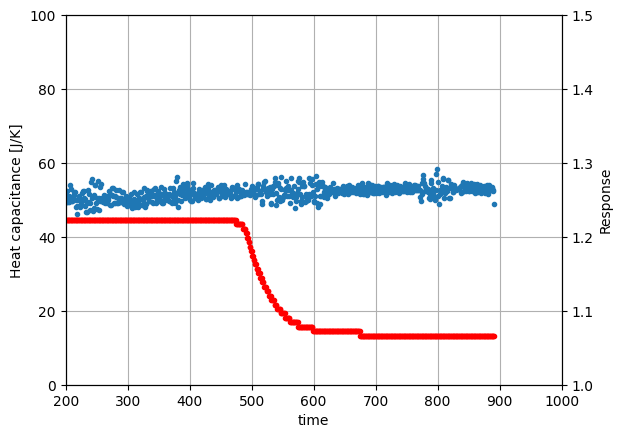

In [119]:
fig, ax = plt.subplots()
c = P[heating] / tdot_heating[heating]
ax.plot(time[heating], c, '.')
ax.grid()
ax.set_xlabel('time')
ax.set_ylabel('Heat capacitance [J/K]')
ax.set_xlim(200, 1000)
ax.set_ylim(0,100)

ax1 = ax.twinx()
ax1.plot(time[heating], response[heating], 'r.')
ax1.set_ylabel('Response')
ax1.set_ylim(1.0, 1.5)